the reason for this that we wanna understand   
how variance decomp work  
and validate our functions

# import necessary libraries

In [62]:
from weights_linear_regression import *
from weights import *
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
print('set up a model with 3 inputs and 2 outputs')
print('[Y1 Y2] = [X1 X2 X3][B1 B2] + noise')

feature_weights = [[5,3,2]]
#this is number of ys
N_RESPONSES = 1
#use for later, but the number of samples N
N_SAMPLES = 100

feature_weights = np.array(feature_weights * N_RESPONSES).T
print()


N_FEATURES = len(feature_weights)
true_beta =  np.ones((N_FEATURES, N_RESPONSES))

#assign weights
true_beta = true_beta * feature_weights

print(f'the true beta is')
print(true_beta)
print('each row is the weights that correlate a feature to the outputs')


set up a model with 3 inputs and 2 outputs
[Y1 Y2] = [X1 X2 X3][B1 B2] + noise

the true beta is
[[5.]
 [3.]
 [2.]]
each row is the weights that correlate a feature to the outputs


In [3]:
print('come up with the matrix X')
X = np.random.random_sample((N_SAMPLES, N_FEATURES))
print(f'and the design matrix has the shape {X.shape}')


come up with the matrix X
and the design matrix has the shape (100, 3)


In [4]:
print(f'compile the problem')
noise_mean = 0
noise_std = 1
noise_vector = np.random.normal(noise_mean,noise_std,
                                (N_SAMPLES, N_RESPONSES))
print(f'the noise vector has the shape of {noise_vector.shape}')
print()
print(f'we can take the weight vector, and give a rought measure of SNR for the {N_FEATURES} features')
print('feature_weights / noise_std = ')
print(feature_weights/noise_std)

compile the problem
the noise vector has the shape of (100, 1)

we can take the weight vector, and give a rought measure of SNR for the 3 features
feature_weights / noise_std = 
[[5.]
 [3.]
 [2.]]


In [5]:
print('generate response vector')
Y = np.matmul(X, true_beta) + noise_vector
print(f'the Y has the shape of {Y.shape}')

generate response vector
the Y has the shape of (100, 1)


# fit ols

In [6]:
lin_model = sm.OLS(Y, X)

lin_model_result = lin_model.fit()
print(lin_model_result.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.960
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              766.8
Date:                Mon, 08 Mar 2021   Prob (F-statistic):                    2.14e-67
Time:                        12:13:15   Log-Likelihood:                         -150.44
No. Observations:                 100   AIC:                                      306.9
Df Residuals:                      97   BIC:                                      314.7
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [7]:
X.shape

(100, 3)

In [8]:
(neuron_batch_coeff, neuron_batch_pvalue, 
                                sig_flag, sig_p_value_indices) = fit_ols(Y, X)

# let's look at variance decomposition

In [97]:
lin_model_result.ssr

118.63108110493327

In [98]:
lin_model_result.resid

array([ 0.45718469,  2.10260563,  0.59615625, -0.56033211,  0.96941797,
        0.25701202, -2.10267588,  0.37974864,  0.22558972, -0.46461943,
        0.99877241, -0.82852463, -0.14684915,  0.07309764, -0.93752549,
        0.96432476, -0.79064338, -1.61613852,  0.96907558, -1.28072688,
        1.24518249,  1.59064121, -0.61971329, -2.33062978, -1.22004098,
       -0.24310226, -0.22931244, -0.55373543, -1.52469686,  1.30936121,
       -0.80013592,  0.06896558, -0.18741558, -1.58219554,  0.37423894,
       -0.41209869,  2.6312449 , -0.37871797, -0.03697925, -1.48304094,
       -1.36939563, -1.51688741,  1.38465685, -1.36987934,  1.68278144,
        0.60762246,  0.39973971,  0.27767491,  0.92850344, -0.78520143,
       -1.15927099, -1.34378216,  0.16043542, -0.83804514, -0.74327742,
       -1.29059414,  0.02997105,  0.59014434,  1.70087077,  0.30687245,
        1.47153124,  1.22918389,  1.23042456, -0.20716848, -0.74372508,
        1.99724547, -0.37116172, -0.13879089, -1.16912838,  0.69

In [103]:
lin_model_result.centered_tss

477.16173910675553

In [59]:
beta = lin_model_result.params
beta

array([4.81765446, 2.78625585, 2.29285972])

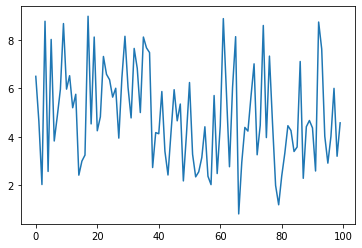

In [63]:
Y_e = X@beta.T
plt.plot(Y_e)

In [64]:
np.squeeze(Y_e).shape

(100,)

In [79]:
Y_sq = np.squeeze(Y)

Y_sq.shape

(100,)

In [105]:
resid  =  np.sum((Y_sq - Y_e)**2)
resid

118.63108110493327

In [94]:
Y_centered = Y_sq
Y_centered = np.reshape(Y_centered, (-1,1))
Y_T = Y_centered.T
print(Y_T.shape)

(1, 100)


In [107]:



SS_tot = Y_sq.T @  Y_sq
print(SS_tot)

SS_e =  resid 
print(resid)

R_2 = 1 - SS_e / SS_tot
R_2

2932.123756139663
118.63108110493327


0.9595409024409259

In [126]:
N_ONES  = 10
y = np.ones(N_ONES, order = 'F' )
print(y)

X = np.ones(N_ONES ) * 0.9

X = np.tile(X, (2,1)).T
print(X)

beta = np.array([0.5,0.5])

X@beta

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]
 [0.9 0.9]]


array([0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9, 0.9])

In [127]:
y - X@beta

array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

In [128]:
(y - X @ beta)**2

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

In [129]:
np.sum((y - X @ beta)**2)

0.09999999999999995

In [140]:
X = np.array([[1, 2,3],
             [1,2,3]])

beta = np.array([1, 1,1]).reshape(-1,1)
X @ beta

array([[6],
       [6]])

In [148]:
X

array([[1, 2, 3],
       [1, 2, 3]])

In [167]:
y

array([[8],
       [7]])

In [188]:
y = np.array([8,7]).reshape(-1,1)


return_normalized = False

(X_NUM_ROWS, X_NUM_COLS) = X.shape

result = list()

for i in range(X_NUM_COLS):
    X_col = X[:, (i,)]
    print(X_col.shape)
    
    beta_row = beta[(i,), :]
    print(beta_row.shape)
    
    print((np.matmul(X_col,  beta_row)).shape)
    temp  = (y - np.matmul(X_col,  beta_row))**2
    temp = np.sum(temp)
    
    result.append(temp)

result = np.array(result)
result = result / X_NUM_ROWS

if return_normalized:  
    result = result / np.var(y)
    
(result)

(2, 1)
(1, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)
(2, 1)
(1, 1)
(2, 1)


array([42.5, 30.5, 20.5])